In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

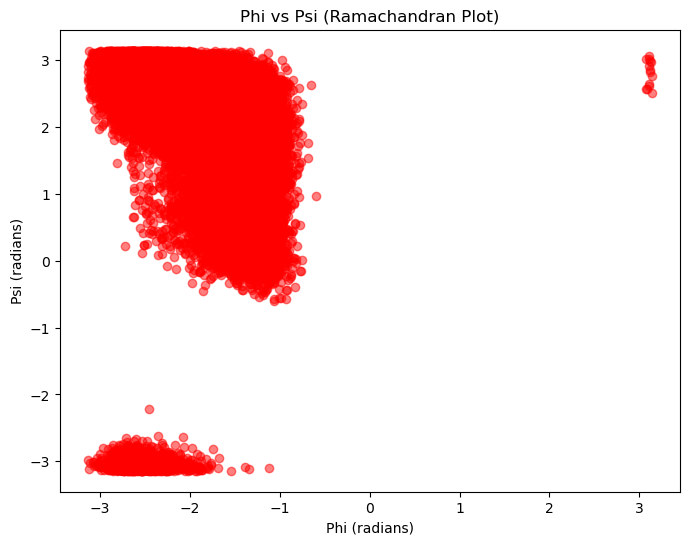

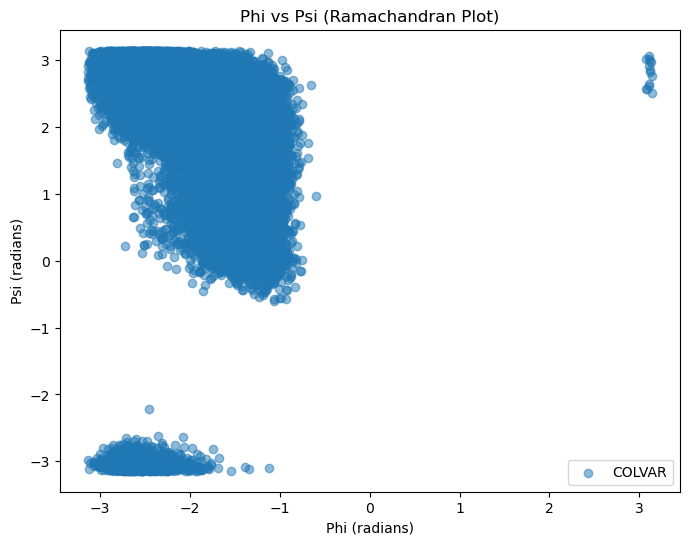

Standard Deviation of Phi: 0.1323156461966539
Standard Deviation of Psi: 0.34315547181307465


In [25]:
# Read in the COLVAR files for phi and psi values
colvar_data_A = np.loadtxt('../topolA/COLVAR', comments='#', usecols=(1, 2))  # Assuming phi is column 1, psi is column 2

# Load the trajectory file and topology to compute dihedrals
traj = md.load('../topolA/traj_comp.xtc', top='../topolA/dialaA.pdb')

phi_indices, phi_angles_a = md.compute_phi(traj)
psi_indices, psi_angles_a = md.compute_psi(traj)

plt.figure(figsize=(8, 6))
plt.scatter(phi_angles_a, psi_angles_a, alpha=0.5,c='r',label='MDTraj')
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Phi vs Psi (Ramachandran Plot)')
plt.show()


# Plotting phi vs psi from COLVAR (Ramachandran-like plot)
plt.figure(figsize=(8, 6))
plt.scatter(colvar_data_A[:, 0], colvar_data_A[:, 1], label='COLVAR', alpha=0.5)
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Phi vs Psi (Ramachandran Plot)')
plt.legend()
plt.show()

# Compute standard deviations of phi and psi from the COLVAR data
std_phi = np.std(colvar_data[:, 0])
std_psi = np.std(colvar_data[:, 1])

print(f'Standard Deviation of Phi: {std_phi}')
print(f'Standard Deviation of Psi: {std_psi}')

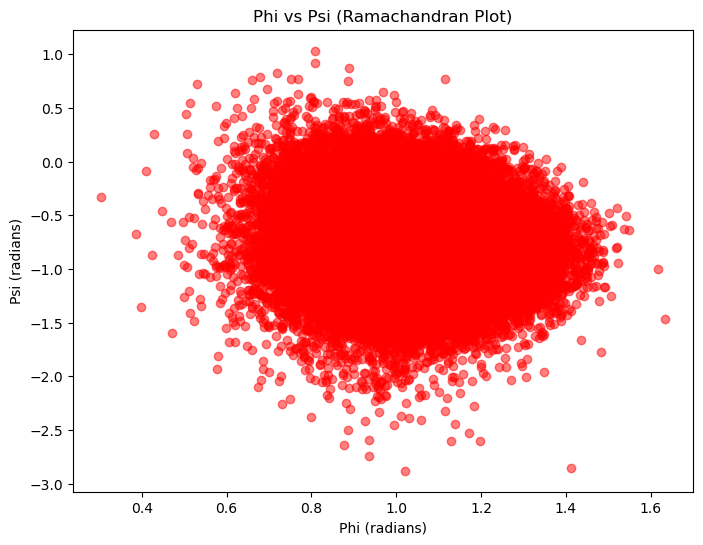

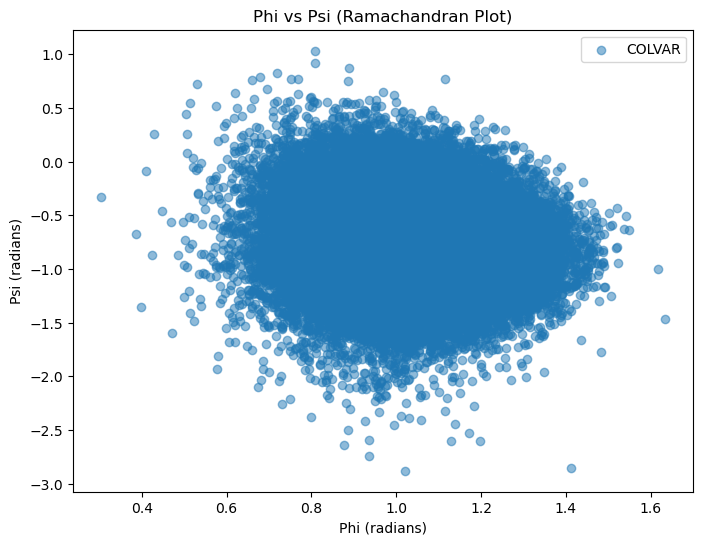

Standard Deviation of Phi: 0.1323156461966539
Standard Deviation of Psi: 0.34315547181307465


In [28]:
# For topolB
# Read in the COLVAR files for phi and psi values
colvar_data_B = np.loadtxt('../topolB/COLVAR', comments='#', usecols=(1, 2))  # Assuming phi is column 1, psi is column 2

# Load the trajectory file and topology to compute dihedrals
traj = md.load('../topolB/traj_comp.xtc', top='../topolB/dialaB.pdb')

phi_indices, phi_angles_b = md.compute_phi(traj)
psi_indices, psi_angles_b = md.compute_psi(traj)

plt.figure(figsize=(8, 6))
plt.scatter(phi_angles_b, psi_angles_b, alpha=0.5,c='r',label='MDTraj')
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Phi vs Psi (Ramachandran Plot)')
plt.show()


# Plotting phi vs psi from COLVAR (Ramachandran-like plot)
plt.figure(figsize=(8, 6))
plt.scatter(colvar_data_B[:, 0], colvar_data_B[:, 1], label='COLVAR', alpha=0.5)
plt.xlabel('Phi (radians)')
plt.ylabel('Psi (radians)')
plt.title('Phi vs Psi (Ramachandran Plot)')
plt.legend()
plt.show()

# Compute standard deviations of phi and psi from the COLVAR data
std_phi = np.std(colvar_data[:, 0])
std_psi = np.std(colvar_data[:, 1])

print(f'Standard Deviation of Phi: {std_phi}')
print(f'Standard Deviation of Psi: {std_psi}')

In [27]:
# calculate standard deviation of phi and psi angles from COLVAR file
phi_std_a = np.std(colvar_data_A[:, 0])
psi_std_a = np.std(colvar_data_A[:, 1])
phi_std_b = np.std(colvar_data_B[:, 0])
psi_std_b = np.std(colvar_data_B[:, 1])
print('Standard deviation of phi angles for traj A: ', phi_std_a)
print('Standard deviation of psi angles for traj A: ', psi_std_a)
print('Standard deviation of phi angles for traj B: ', phi_std_b)
print('Standard deviation of psi angles for traj B: ', psi_std_b)

Standard deviation of phi angles for traj A:  0.5538315442462007
Standard deviation of psi angles for traj A:  1.024898119742263
Standard deviation of phi angles for traj B:  0.1323156461966539
Standard deviation of psi angles for traj B:  0.34315547181307465


In [29]:

# calculate standard deviation of phi and psi angles from traj xtc file
phi_std_a = np.std(phi_angles_a)
psi_std_a = np.std(psi_angles_a)
print('Standard deviation of phi angles for traj A: ', phi_std_a)
print('Standard deviation of psi angles for traj A: ', psi_std_a)
phi_std_b = np.std(phi_angles_b)
psi_std_b = np.std(psi_angles_b)
print('Standard deviation of phi angles for traj B: ', phi_std_b)
print('Standard deviation of psi angles for traj B: ', psi_std_b)

Standard deviation of phi angles for traj A:  0.5538316
Standard deviation of psi angles for traj A:  1.024898
Standard deviation of phi angles for traj B:  0.13231565
Standard deviation of psi angles for traj B:  0.34315547


# LUGANO Task 1

## Plot the negative of the energy column in the grid file, does it look like the FES? Is it slightly different? Perhaps scaled by a constant that you can figure out?

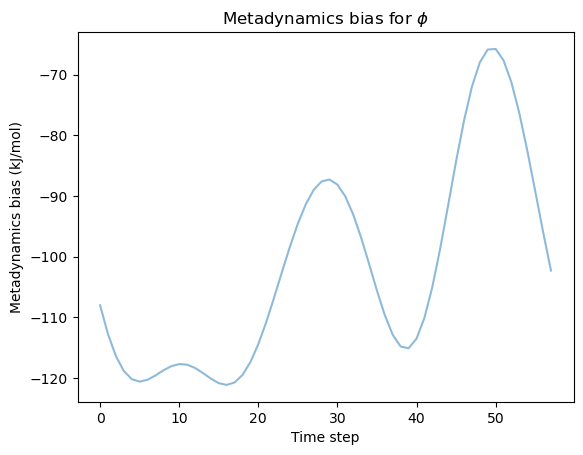

In [4]:
meta_grid = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/ex1_metad_A.grid.dat',
                       comments='#')
x = list(range(meta_grid.shape[0]))

plt.plot(x, -meta_grid[:, 1], alpha=0.5)
plt.title('Metadynamics bias for $\phi$')
plt.ylabel('Metadynamics bias (kJ/mol)')
plt.xlabel('Time step')
plt.show()

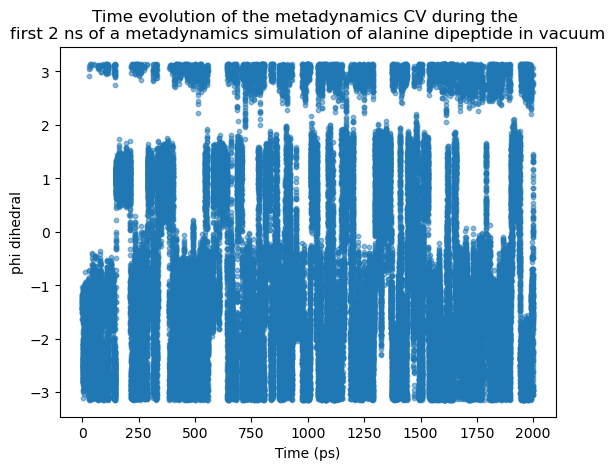

In [6]:
meta_grid = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/COLVAR',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')
plt.show()

Text(0.5, 1.0, 'Time evolution of the Gaussian height')

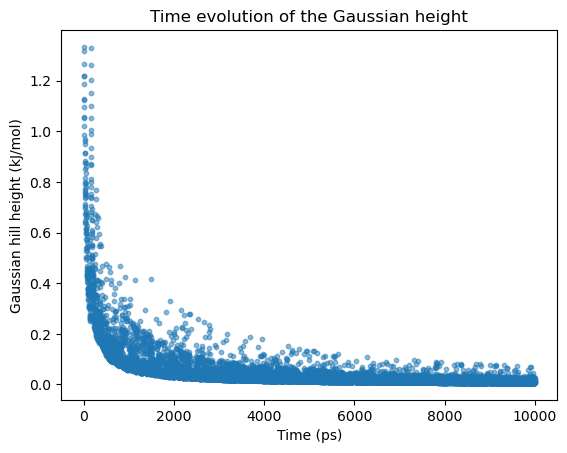

In [7]:
meta_grid = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/HILLS', comments='#')
plt.scatter(meta_grid[:, 0], meta_grid[:, 3], alpha=0.5, s=10)
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian hill height (kJ/mol)')
plt.title('Time evolution of the Gaussian height')

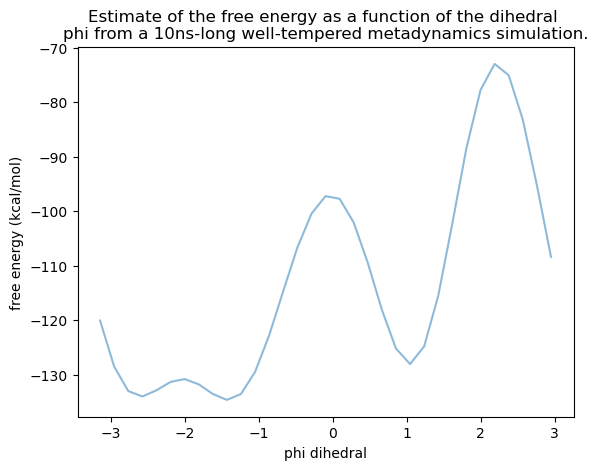

In [10]:
meta_hill = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5)
plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')
plt.title('Estimate of the free energy as a function of the dihedral \n'
          'phi from a 10ns-long well-tempered metadynamics simulation.')
plt.show()

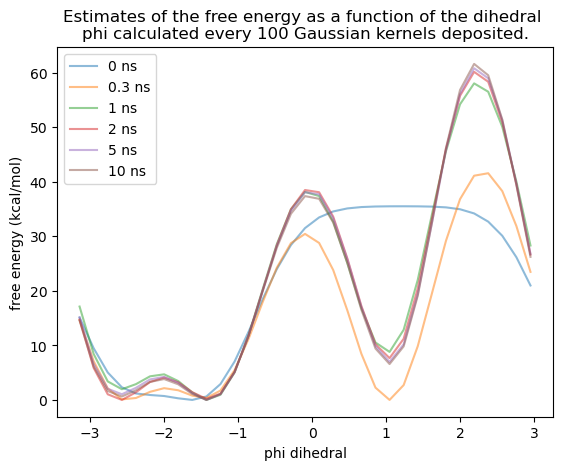

In [15]:
# 0.1 ns
meta_hill_00 = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes_0.dat', comments='#')
# 0.3 ns
meta_hill_03 = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes_3.dat', comments='#')
# 1 ns
meta_hill_1 = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes_10.dat', comments='#')
# 2 ns
meta_hill_2 = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes_20.dat', comments='#')
# 5 ns
meta_hill_5 = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes_50.dat', comments='#')
# 10 ns
meta_hill_10 = np.loadtxt('/home/fh2268/comp-lab-class-2024/Week6-Metadynamics/Lugano/MetaD_ex1/fes_100.dat', comments='#')

plt.plot(meta_hill_00[:,0], meta_hill_00[:,1], alpha=0.5, label='0 ns')
plt.plot(meta_hill_03[:,0], meta_hill_03[:,1], alpha=0.5, label='0.3 ns')
plt.plot(meta_hill_1[:,0], meta_hill_1[:,1], alpha=0.5, label='1 ns')
plt.plot(meta_hill_2[:,0], meta_hill_2[:,1], alpha=0.5, label='2 ns')
plt.plot(meta_hill_5[:,0], meta_hill_5[:,1], alpha=0.5, label='5 ns')
plt.plot(meta_hill_10[:,0], meta_hill_10[:,1], alpha=0.5, label='10 ns')

plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')
plt.legend()
plt.title('Estimates of the free energy as a function of the dihedral \n'
          'phi calculated every 100 Gaussian kernels deposited.')
plt.show()

# 2D

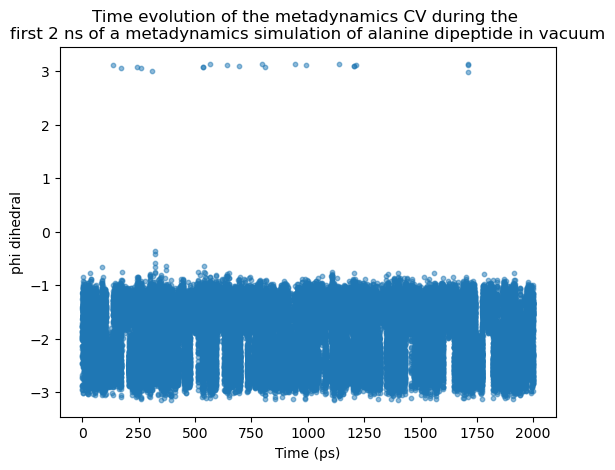

In [16]:
meta_grid = np.loadtxt('../Lugano/MetaD_2d/ex1_metad_COLVAR_A_bf1',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')
plt.show()

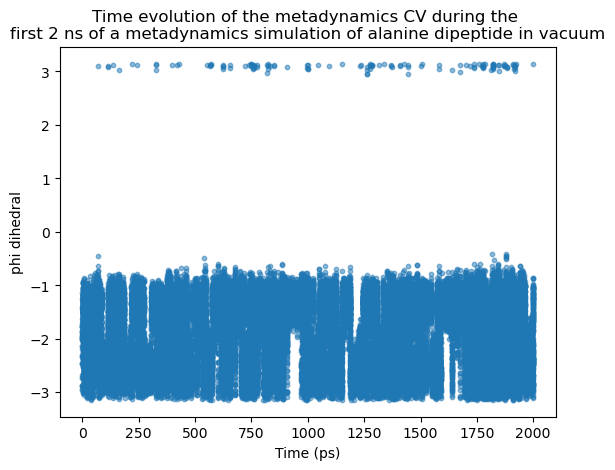

In [14]:
meta_grid = np.loadtxt('../Lugano/MetaD_2d/ex1_metad_COLVAR_A_bf2',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')
plt.show()

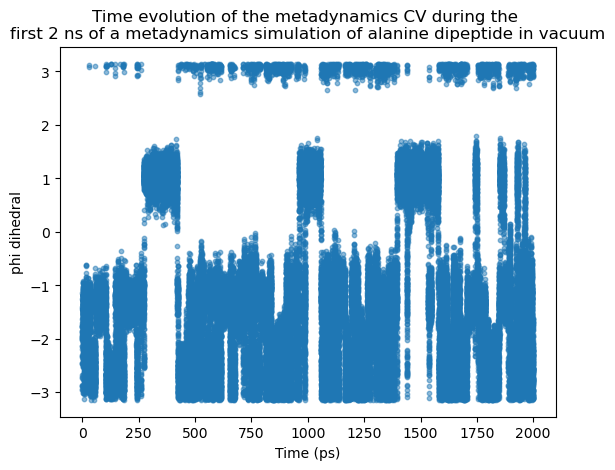

In [15]:
meta_grid = np.loadtxt('../Lugano/MetaD_2d/ex1_metad_COLVAR_A_bf5',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')
plt.show()

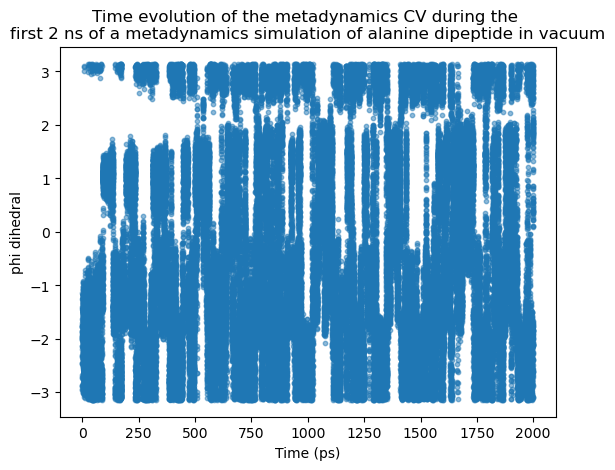

In [16]:
meta_grid = np.loadtxt('../Lugano/MetaD_2d/ex1_metad_COLVAR_A_bf15',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')
plt.savefig('../Figures/Lugano_ex3_phi-time_2ns_A_biasfactor15.png')

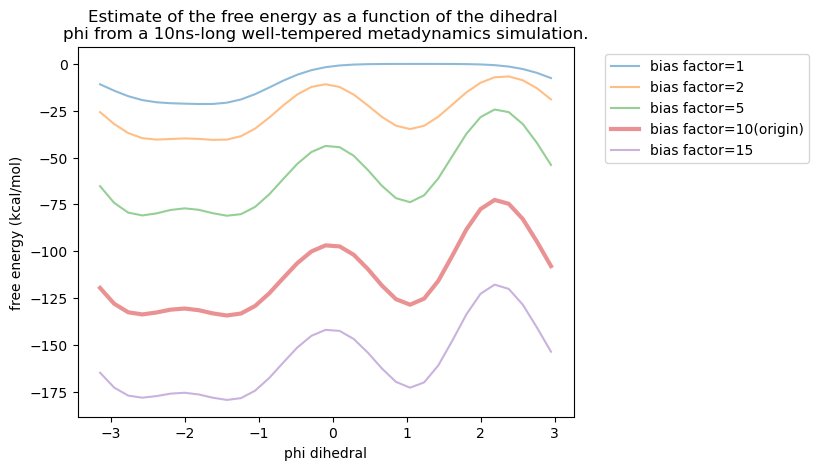

In [3]:
meta_hill = np.loadtxt('../Lugano/MetaD_2d/metad_hill_A_all_biasf1.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5, label='bias factor=1')

meta_hill = np.loadtxt('../Lugano/MetaD_2d/metad_hill_A_all_biasf2.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5, label='bias factor=2')

meta_hill = np.loadtxt('../Lugano/MetaD_2d/metad_hill_A_all_biasf5.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5, label='bias factor=5')

meta_hill = np.loadtxt('../Lugano/MetaD_2d/metad_hill_A_all.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5, label='bias factor=10(origin)', linewidth=3)

meta_hill = np.loadtxt('../Lugano/MetaD_2d/metad_hill_A_all_biasf15.dat', comments='#')
plt.plot(meta_hill[:,0], meta_hill[:,1], alpha=0.5, label='bias factor=15')

plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Estimate of the free energy as a function of the dihedral \n'
          'phi from a 10ns-long well-tempered metadynamics simulation.')
plt.show()